<a href="https://colab.research.google.com/github/singhharsh246/Leetcodes/blob/main/Copy_of_Modified_Version_2_RandomForest_feature_importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

import time
import numpy as np

import pandas as pd
from google.colab import drive

import re

import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data = pd.read_csv('/content/gdrive/Shareddrives/KQED_Practicum/EDA_Phase3_Jan_2022/all_merged_2.csv')

In [ ]:
## to convert it from string to int ####

data['Median Household Income in Dollars'] = list(int(re.search(r"\$(.*),(.*)", i).group(1) + re.search(r"\$(.*),(.*)", i).group(2))   for i in list(data['Median Household Income in Dollars']))

In [ ]:
list(data['Median Household Income in Dollars'])

[132444,
 107589,
 121795,
 106555,
 135234,
 87084,
 87084,
 132444,
 132444,
 112069,
 135234,
 132444,
 106555,
 132444,
 132444,
 85704,
 85770,
 107589,
 87084,
 107589,
 132444,
 107589,
 106555,
 107589,
 135234,
 107589,
 132444,
 112069,
 135234,
 87084,
 132444,
 121795,
 90230,
 107589,
 106555,
 106555,
 87084,
 135234,
 106555,
 121795,
 107589,
 106555,
 132444,
 87084,
 107589,
 107589,
 121795,
 112069,
 76509,
 121795,
 112069,
 87084,
 132444,
 112069,
 87084,
 132444,
 107589,
 106555,
 106555,
 85704,
 107589,
 68634,
 85770,
 106555,
 112069,
 121795,
 107589,
 132444,
 107589,
 121795,
 112069,
 106555,
 132444,
 106555,
 121795,
 106555,
 107589,
 85770,
 132444,
 76509,
 106555,
 106555,
 87084,
 107589,
 132444,
 107589,
 106555,
 132444,
 132444,
 121795,
 107589,
 107589,
 112069,
 85770,
 107589,
 87084,
 106555,
 107589,
 112069,
 132444,
 87084,
 121795,
 85704,
 135234,
 52309,
 106555,
 107589,
 87084,
 106555,
 121795,
 87084,
 107589,
 85770,
 112069,


In [ ]:
data.head()

,Unnamed: 0,ROI_FAMILY_ID,Number_next_transaction_higher,LAST_PAY_METHOD,LAST_CONTACT_TYPE,LAST_PROMOTION,LAST_DONATION_AMOUNT,Avg_Transaction_amount,Unique_pay_methods,ROI_ID,ZIPCODE,CURRENT_AGE,GENDER,DO_NOT_CONTACT,ADDRESS_CONTACT_STATUS,FIRST_GIFT_DATE,FIRST_GIFT_AMOUNT,MRC_DATE,MRC_AMOUNT,MEMBERSHIP_JOIN_DATE,MEMBERSHIP_RENEWAL_DATE,MEMBERSHIP_TYPE,STATUS,MEMBERSHIP_DURATION,MEMBERSHIP_JOIN_YEAR,MRC_YEAR,FIRST_GIFT_YEAR,MEMBERSHIP_RENEWAL_YEAR,Churn,TOTAL_TRANSACTIONS_MADE,TOTAL_TRANSACTIONS_AMOUNT,ZIP,COUNTY_FIP,USPS_ZIP_PREF_CITY,COUNTY_NAME,STATE,STATE_NAME,TotalPopulation,Geolocation,Poverty Universe,Number in Poverty,All Ages in Poverty Percent,Median Household Income in Dollars,Median Household Income in Dollars LB 90%,Median Household Income in Dollars UB 90%,TRANSACTION_COUNT_BY_2018,TRANSACTION_AMOUNT_BY_2018
0,0,9,1,Check,Mail,Membership,150,143.750000,1,9,94043,64.000000,FEMALE,N,Y,1989-03-13,60.0,2021-07-03,150.0,1989-03-13,2022-07-31,LEADERSHIP_CIRCLE,Active,29,1989,2021.0,1989.0,2022,0.0,41.0,4369.0,94043,6085,MOUNTAIN VIEW,Santa Clara,CA,California,1927852,POINT (-121.6961445 37.23263642),"1,900,407","116,401",6.1,132444,"$129,361","$135,527",8,1150.0
1,1,14,0,Check,Mail,Membership,50,37.500000,1,14,94705,69.000000,FEMALE,N,Y,1984-08-07,35.0,2021-08-26,60.0,1984-08-07,2022-08-31,GENERAL_MEMBER,Active,34,1984,2021.0,1984.0,2022,0.0,14.0,565.0,94705,6001,BERKELEY,Alameda,CA,California,1671329,POINT (-121.8893196 37.64555147),"1,640,963","146,315",8.9,107589,"$105,354","$109,824",2,75.0
2,2,5066,1,Visa,Web,Web,5,13.611111,1,5066,94110,75.000000,MALE,N,Y,1983-03-10,35.0,2022-01-04,5.0,1983-03-10,2022-09-30,GENERAL_MEMBER,Active,35,1983,2022.0,1983.0,2022,0.0,65.0,940.0,94110,6075,SAN FRANCISCO,San Francisco,CA,California,881549,POINT (-122.4393922 37.75999356),"865,424","82,616",9.5,121795,"$118,061","$125,529",18,245.0
3,3,5090,2,Check,Mail,Membership,30,43.166667,2,5090,94517,81.000000,FEMALE,N,Y,1983-03-05,50.0,2021-11-24,25.0,1983-03-05,2022-11-30,GENERAL_MEMBER,Active,35,1983,2021.0,1983.0,2022,0.0,46.0,1965.0,94517,6013,CLAYTON,Contra Costa,CA,California,1153526,POINT (-121.927827 37.91916061),"1,143,554","90,482",7.9,106555,"$103,354","$109,756",6,259.0
4,4,6916,0,Visa,Telesales,On-Air,64,64.000000,1,6916,94038,75.360889,MALE,N,Y,1983-03-16,100.0,2021-12-12,384.0,1983-03-16,2022-12-31,LEADERSHIP_CIRCLE,Active,35,1983,2021.0,1983.0,2022,0.0,29.0,2550.0,94038,6081,MOSS BEACH,San Mateo,CA,California,766573,POINT (-122.3273639 37.42322968),"759,898","46,328",6.1,135234,"$129,894","$140,574",1,64.0


In [ ]:
data.describe()

,Unnamed: 0,ROI_FAMILY_ID,Number_next_transaction_higher,LAST_DONATION_AMOUNT,Avg_Transaction_amount,Unique_pay_methods,ROI_ID,ZIPCODE,CURRENT_AGE,FIRST_GIFT_AMOUNT,MRC_AMOUNT,MEMBERSHIP_DURATION,MEMBERSHIP_JOIN_YEAR,MRC_YEAR,FIRST_GIFT_YEAR,MEMBERSHIP_RENEWAL_YEAR,Churn,TOTAL_TRANSACTIONS_MADE,TOTAL_TRANSACTIONS_AMOUNT,ZIP,COUNTY_FIP,TotalPopulation,All Ages in Poverty Percent,Median Household Income in Dollars,TRANSACTION_COUNT_BY_2018,TRANSACTION_AMOUNT_BY_2018
count,258158.000000,2.581580e+05,258158.000000,258158.000000,258158.000000,258158.000000,2.581580e+05,258158.000000,258158.000000,258158.000000,258158.000000,258158.000000,258158.000000,258158.000000,258158.000000,258158.000000,258158.000000,258158.000000,258158.000000,258158.000000,258158.000000,2.581580e+05,258158.000000,258158.000000,258158.000000,258158.000000
mean,129078.500000,9.596361e+06,2.302110,66.576860,61.036171,1.528173,9.596361e+06,93151.546441,66.003409,71.034962,70.392425,13.463476,2004.536524,2020.379709,2004.510385,2021.093408,0.139705,45.187978,1584.417996,93151.546441,7303.357990,1.122718e+06,8.332768,108816.310035,21.916977,722.249952
std,74523.939734,1.123279e+07,3.951797,100.512876,82.580615,0.722294,1.123279e+07,9695.084880,12.901661,173.973451,120.653204,12.112388,12.112388,1.254312,12.198793,1.416873,0.346682,47.506669,2182.901986,9695.084880,6588.847475,8.625280e+05,2.274527,21054.469868,26.878358,952.241191
min,0.000000,9.000000e+00,0.000000,0.000000,0.000000,1.000000,9.000000e+00,1002.000000,23.000000,0.010000,0.010000,0.000000,1954.000000,2000.000000,1954.000000,1998.000000,0.000000,1.000000,0.750000,1002.000000,1003.000000,7.690000e+02,2.700000,30944.000000,1.000000,0.000000
25%,64539.250000,5.517689e+06,0.000000,15.000000,15.000000,1.000000,5.517689e+06,94115.000000,57.000000,25.000000,15.000000,2.000000,1995.000000,2020.000000,1995.000000,2020.000000,0.000000,12.000000,380.000000,94115.000000,6013.000000,4.943360e+05,6.100000,90230.000000,4.000000,180.000000
50%,129078.500000,7.457930e+06,1.000000,30.000000,31.136364,1.000000,7.457930e+06,94574.000000,66.000000,40.000000,25.000000,10.000000,2008.000000,2021.000000,2008.000000,2022.000000,0.000000,33.000000,940.000000,94574.000000,6075.000000,8.815490e+05,7.900000,107589.000000,11.000000,425.000000
75%,193617.750000,1.153692e+07,3.000000,75.000000,75.000000,2.000000,1.153692e+07,94965.000000,75.000000,88.500000,78.000000,23.000000,2016.000000,2021.000000,2016.000000,2022.000000,0.000000,61.000000,1988.000000,94965.000000,6085.000000,1.671329e+06,9.500000,132444.000000,28.000000,924.000000
max,258157.000000,9.107501e+07,233.000000,15000.000000,12142.857143,7.000000,9.107501e+07,99901.000000,121.000000,70307.000000,18734.630000,64.000000,2018.000000,2022.000000,2070.000000,2023.000000,1.000000,777.000000,266396.000000,99901.000000,56045.000000,1.003911e+07,35.800000,151806.000000,806.000000,85000.000000


In [ ]:
data.isnull().sum()

Unnamed: 0                                   0
ROI_FAMILY_ID                                0
Number_next_transaction_higher               0
LAST_PAY_METHOD                              0
LAST_CONTACT_TYPE                            0
LAST_PROMOTION                               0
LAST_DONATION_AMOUNT                         0
Avg_Transaction_amount                       0
Unique_pay_methods                           0
ROI_ID                                       0
ZIPCODE                                      0
CURRENT_AGE                                  0
GENDER                                       0
DO_NOT_CONTACT                               0
ADDRESS_CONTACT_STATUS                       0
FIRST_GIFT_DATE                              0
FIRST_GIFT_AMOUNT                            0
MRC_DATE                                     0
MRC_AMOUNT                                   0
MEMBERSHIP_JOIN_DATE                         0
MEMBERSHIP_RENEWAL_DATE                      0
MEMBERSHIP_TY

In [ ]:
data.columns

Index(['Unnamed: 0', 'ROI_FAMILY_ID', 'Number_next_transaction_higher',
       'LAST_PAY_METHOD', 'LAST_CONTACT_TYPE', 'LAST_PROMOTION',
       'LAST_DONATION_AMOUNT', 'Avg_Transaction_amount', 'Unique_pay_methods',
       'ROI_ID', 'ZIPCODE', 'CURRENT_AGE', 'GENDER', 'DO_NOT_CONTACT',
       'ADDRESS_CONTACT_STATUS', 'FIRST_GIFT_DATE', 'FIRST_GIFT_AMOUNT',
       'MRC_DATE', 'MRC_AMOUNT', 'MEMBERSHIP_JOIN_DATE',
       'MEMBERSHIP_RENEWAL_DATE', 'MEMBERSHIP_TYPE', 'STATUS',
       'MEMBERSHIP_DURATION', 'MEMBERSHIP_JOIN_YEAR', 'MRC_YEAR',
       'FIRST_GIFT_YEAR', 'MEMBERSHIP_RENEWAL_YEAR', 'Churn',
       'TOTAL_TRANSACTIONS_MADE', 'TOTAL_TRANSACTIONS_AMOUNT', 'ZIP',
       'COUNTY_FIP', 'USPS_ZIP_PREF_CITY', 'COUNTY_NAME', 'STATE',
       'STATE_NAME', 'TotalPopulation', 'Geolocation', 'Poverty Universe',
       'Number in Poverty', 'All Ages in Poverty Percent',
       'Median Household Income in Dollars',
       'Median Household Income in Dollars LB 90%',
       'Median Household

**EDA ends here. Main part of the code is starting from this point onwards**

In [ ]:
def reading_data():
  data = pd.read_csv('/content/gdrive/Shareddrives/KQED_Practicum/EDA_Phase3_Jan_2022/all_merged_2.csv')
  data['Median Household Income in Dollars'] = list(int(re.search(r"\$(.*),(.*)", i).group(1) + re.search(r"\$(.*),(.*)", i).group(2))   for i in list(data['Median Household Income in Dollars']))
  return (data)



In [ ]:
def feature_engineering(data):

  columns = ['Number_next_transaction_higher','LAST_DONATION_AMOUNT','Avg_Transaction_amount','Unique_pay_methods','ZIPCODE','CURRENT_AGE', 'FIRST_GIFT_AMOUNT','MEMBERSHIP_DURATION','MEMBERSHIP_JOIN_YEAR','FIRST_GIFT_YEAR','COUNTY_FIP','TotalPopulation','All Ages in Poverty Percent','TRANSACTION_COUNT_BY_2018','TRANSACTION_AMOUNT_BY_2018']
  col_y = ['Churn']

  partial = data.loc[:, list(True if i in columns else False for i in list(data.columns))]
  y = data.loc[:, list(True if i in col_y else False for i in list(data.columns))]

  print(partial.columns)

  X_train, X_test, y_train, y_test = train_test_split(partial, y, stratify=y, random_state=42)

  return(partial, X_train, X_test, y_train, y_test)


In [ ]:
def forest_fit(X_train, y_train, partial):

  
  forest = RandomForestClassifier(random_state=0)
  forest.fit(X_train, y_train)

  return (forest)

In [ ]:
### impurity based feature importance ####

def impurity_feature_importance(forest, X_train, X_test, y_train, y_test, partial):

  """
    Function to calculate impurity based feature importance.
    More details could be found at sci-kit's website.
  """

  feature_names = [f"feature {i}" for i in range(partial.shape[1])]
  feature_names = [i for i in list(partial.columns)]

  start_time = time.time()
  importances = forest.feature_importances_
  std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
  elapsed_time = time.time() - start_time

  print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

  forest_importances = pd.Series(importances, index=feature_names)

  fig, ax = plt.subplots(figsize = (9, 8))
  forest_importances.plot.bar(yerr=std, ax=ax)
  ax.set_title("Feature importances using Mean Decrease in Impurity (MDI)")
  ax.set_ylabel("Mean decrease in impurity")
  plt.xticks(rotation=90)
  fig.tight_layout()
  plt.show()

In [ ]:
###  permutation based feature importance  ####

def permutation_feature_importance(forest, X_train, X_test, y_train, y_test, partial):

  """
    Function to calculate feature importance based on column shuffling as taught in class. 
    More details in BAX 452 course or sci-kit website. 
  """
  #feature_names = [f"feature {i}" for i in range(partial.shape[1])]
  feature_names = [i for i in list(partial.columns)]

  start_time = time.time()
  result = permutation_importance(
      forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
  )
  elapsed_time = time.time() - start_time
  print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

  forest_importances = pd.Series(result.importances_mean, index=feature_names)

  fig, ax = plt.subplots(figsize = (9, 8))
  forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
  ax.set_title("Feature importances using permutation on full model")
  ax.set_ylabel("Mean accuracy decrease")
  fig.tight_layout()
  plt.show()

Index(['Number_next_transaction_higher', 'LAST_DONATION_AMOUNT',
       'Avg_Transaction_amount', 'Unique_pay_methods', 'ZIPCODE',
       'CURRENT_AGE', 'FIRST_GIFT_AMOUNT', 'MEMBERSHIP_DURATION',
       'MEMBERSHIP_JOIN_YEAR', 'FIRST_GIFT_YEAR', 'COUNTY_FIP',
       'TotalPopulation', 'All Ages in Poverty Percent',
       'TRANSACTION_COUNT_BY_2018', 'TRANSACTION_AMOUNT_BY_2018'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Impurity Feature Importance
Elapsed time to compute the importances: 0.116 seconds


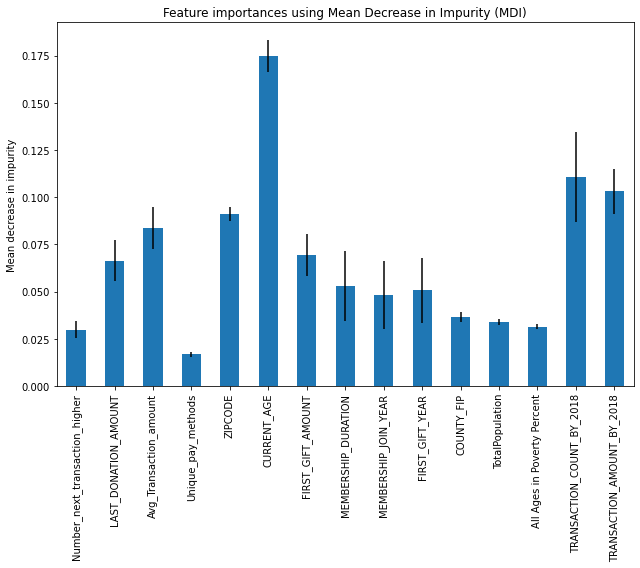

Shuffle based Feature Importance
Elapsed time to compute the importances: 229.392 seconds


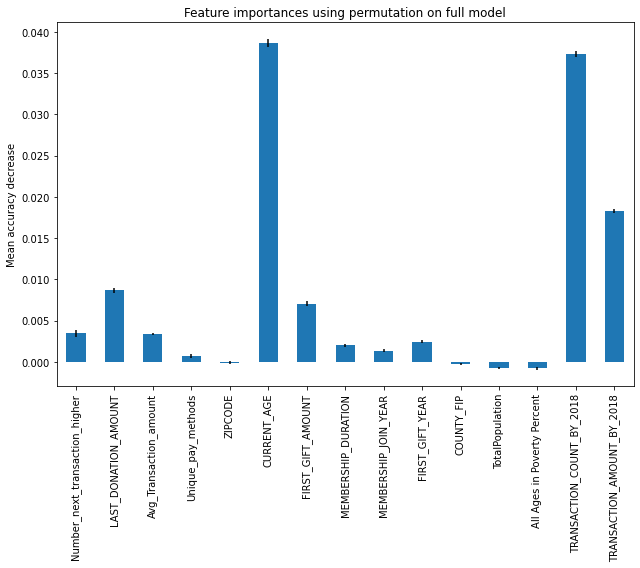

In [ ]:
##### Run this block to run the code ####

if __name__ == "__main__":

  data = reading_data()
  partial, X_train, X_test, y_train, y_test = feature_engineering(data)
  forest = forest_fit(X_train, y_train, partial)

  ### running impurity based feature importance ###

  print("Impurity Feature Importance")

  impurity_feature_importance(forest, X_train, X_test, y_train, y_test, partial)

  ### running permutation based feature importance ###

  print("Shuffle based Feature Importance")

  permutation_feature_importance(forest, X_train, X_test, y_train, y_test, partial)


### Run multiple trees with and without the variable. It computes the average importance of that specific feature. Metric = "Mean Decrease in Impurity" 